Unemployment Analysis in India

Aim: To analyze unemployment trends in India from 2019 to 2020 across states, regions (North, South, etc.), and rural/urban areas to identify disparities, seasonal patterns, and the impact of the COVID-19 pandemic. 

Importing neccessary libraries


In [1]:
import pickle
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import ydata_profiling as pp
warnings.filterwarnings(category=FutureWarning, action= 'ignore')

%matplotlib inline

Data Loading

In [2]:
data= pd.read_csv("D:\\desktop\\Portfolio projects\\Python\\Unemployment Analysis\\Unemployment in India.csv")
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
data_rate= pd.read_csv(r"D:\\desktop\\Portfolio projects\\Python\Unemployment Analysis\\Unemployment_Rate_upto_11_2020.csv")
data_rate.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
data_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [6]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [7]:
data_rate.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


Data Cleaning

In [8]:
#Checking for missing values
# Check missing values
missing_values = data.isnull().sum()
print("Missing Values per Column:\n", missing_values)

# Count fully missing rows
fully_missing_rows = data[data.isnull().all(axis=1)].shape[0]
print("Fully Missing Rows:", fully_missing_rows)



Missing Values per Column:
 Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64
Fully Missing Rows: 28


Since all columns are missing in 28 rows, it's safe to drop them.

In [9]:
#Dropping null values
data.dropna(how="all", inplace=True)
print(f"Rows after dropping fully missing rows: {data.shape[0]}")


Rows after dropping fully missing rows: 740


In [10]:
print(data_rate.isnull().sum())

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


In [11]:
#checking for duplicate values
# Check duplicates
duplicate_rows = data.duplicated().sum()
print("Duplicate Rows:", duplicate_rows)


Duplicate Rows: 0


In [12]:
# Check duplicates
duplicate_rows = data_rate.duplicated().sum()
print("Duplicate Rows:", duplicate_rows)


Duplicate Rows: 0


In [13]:
#Drop duplicates
data.drop_duplicates(inplace= True)


In [14]:
print(data.duplicated().sum())

0


In [15]:

numerical_cols= data.select_dtypes("number")
numerical_cols

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,3.65,11999139.0,43.24
1,3.05,11755881.0,42.05
2,3.75,12086707.0,43.50
3,3.32,12285693.0,43.97
4,5.17,12256762.0,44.68
...,...,...,...
749,7.55,10871168.0,44.09
750,6.67,10806105.0,43.34
751,15.63,9299466.0,41.20
752,15.22,9240903.0,40.67


In [16]:
data.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [17]:
#Strip any whitespaces
data.columns = data.columns.str.strip()
data.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [18]:
# Convert date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
#data.columns

In [19]:
#Rename Region to State
data.rename(columns={"Region": "State"}, inplace= True)
data.head()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


In [20]:
cat_columns=data.select_dtypes("object")
cat_columns.head()

,State,Frequency,Area
0,Andhra Pradesh,Monthly,Rural
1,Andhra Pradesh,Monthly,Rural
2,Andhra Pradesh,Monthly,Rural
3,Andhra Pradesh,Monthly,Rural
4,Andhra Pradesh,Monthly,Rural


In [21]:
#Checking for inconsistent entries
for col in cat_columns:
    print(f"Unique values in {col}: {data[col].unique()}\n")

# Replace inconsistent entries
data["Frequency"] = data["Frequency"].replace({
    ' Monthly': 'Monthly' # Fix extra space
})

Unique values in State: ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Chandigarh']

Unique values in Frequency: [' Monthly' 'Monthly']

Unique values in Area: ['Rural' 'Urban']



In [22]:
data["Frequency"].unique()

array(['Monthly'], dtype=object)

In [23]:
data.to_csv("cleaned_dataset.csv", index=False)

In [24]:
data_rate.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [25]:
data_rate.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Region.1                                     object
longitude                                   float64
latitude                                    float64
dtype: object

In [26]:
#Strip any whitespaces
data_rate.columns = data_rate.columns.str.strip()
data_rate.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [27]:
# Convert date column to datetime format
data_rate['Date'] = pd.to_datetime(data_rate['Date'], dayfirst=True)
data_rate.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                  int64
Estimated Labour Participation Rate (%)           float64
Region.1                                           object
longitude                                         float64
latitude                                          float64
dtype: object

In [28]:
#Rename Region1 to Region
#Rename Region to State
data_rate.rename(columns={"Region": "State", "Region.1": "Region"}, inplace=True)



In [29]:
data_rate.head()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region,longitude,latitude
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74


In [30]:
category_columns=data_rate.select_dtypes("object")
category_columns.head()

,State,Frequency,Region
0,Andhra Pradesh,M,South
1,Andhra Pradesh,M,South
2,Andhra Pradesh,M,South
3,Andhra Pradesh,M,South
4,Andhra Pradesh,M,South


In [31]:
for col in category_columns:
    print(f"Unique values in {col}: {data_rate[col].unique()}\n")


Unique values in State: ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']

Unique values in Frequency: [' M']

Unique values in Region: ['South' 'Northeast' 'East' 'West' 'North']



In [32]:
data_rate["Frequency"] = data_rate["Frequency"].replace({
    ' M': 'Monthly' 
})

data_rate.head()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region,longitude,latitude
0,Andhra Pradesh,2020-01-31,Monthly,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,2020-02-29,Monthly,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,2020-03-31,Monthly,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,2020-04-30,Monthly,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,2020-05-31,Monthly,17.43,12988845,36.46,South,15.9129,79.74


In [33]:
data["Frequency"].unique()

array(['Monthly'], dtype=object)

In [34]:
data_rate.to_csv("cleaned_unemployment_data.csv", index=False)

In [35]:
#Loading the cleaned dataset
df= pd.read_csv("cleaned_unemployment_data.csv")
df1= pd.read_csv("cleaned_dataset.csv")
df.head()


,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region,longitude,latitude
0,Andhra Pradesh,2020-01-31,Monthly,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,2020-02-29,Monthly,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,2020-03-31,Monthly,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,2020-04-30,Monthly,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,2020-05-31,Monthly,17.43,12988845,36.46,South,15.9129,79.74


In [36]:
df1.head()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


In [37]:
print(df.shape)
print(df1.shape)

(267, 9)
(740, 7)


Exploratory Data Analysis

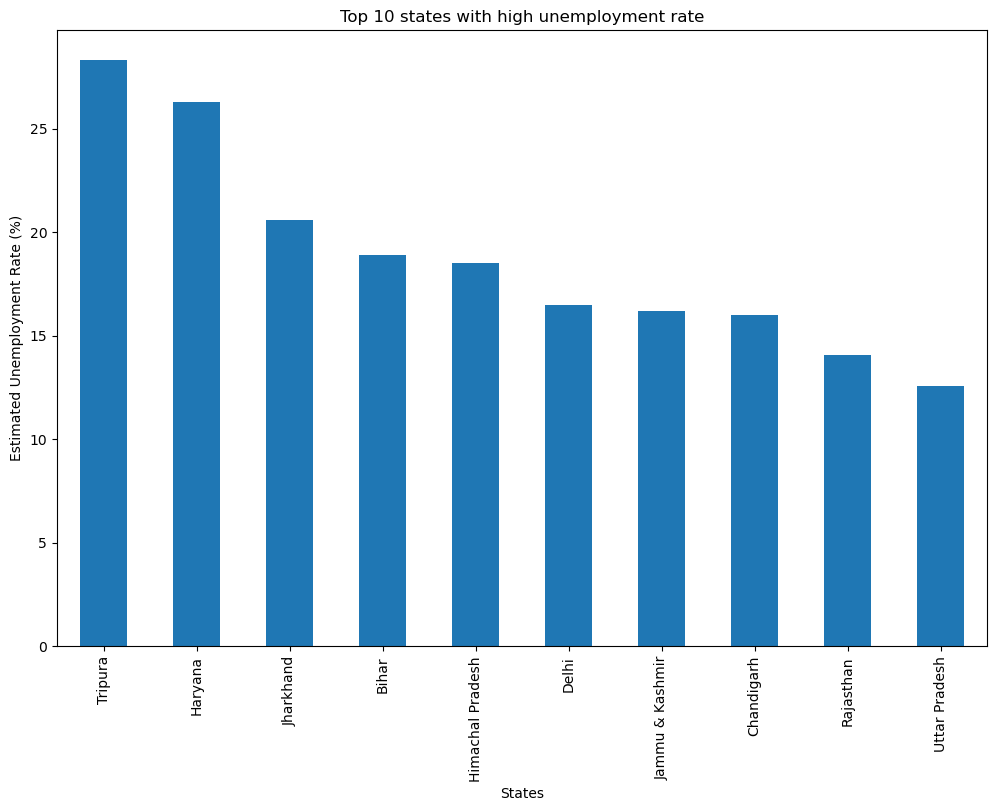

In [38]:
plt.figure(figsize= (12,8))
state_unemployment = df1.groupby('State')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
state_unemployment.head(10).plot(kind= 'bar')
plt.title("Top 10 states with high unemployment rate")
plt.xlabel("States")
plt.ylabel("Estimated Unemployment Rate (%)");


In [39]:
df1["Date"] = pd.to_datetime(df1["Date"], errors='coerce')

In [40]:
df1["Date"].dtype

dtype('<M8[ns]')

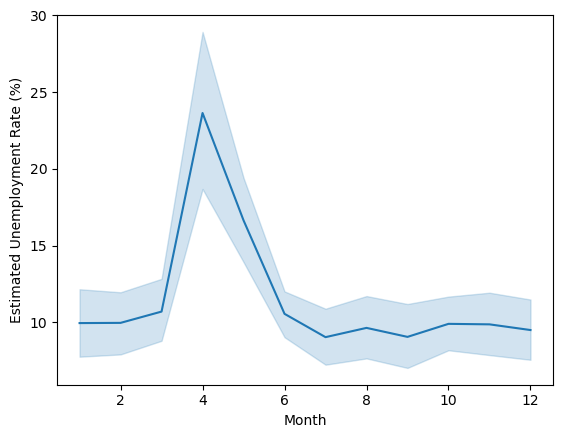

In [41]:
df1["Month"]= df1["Date"].dt.month
sns.lineplot(x= 'Month', y= 'Estimated Unemployment Rate (%)', data= df1)
plt.xlabel("Month")
plt.xticks;

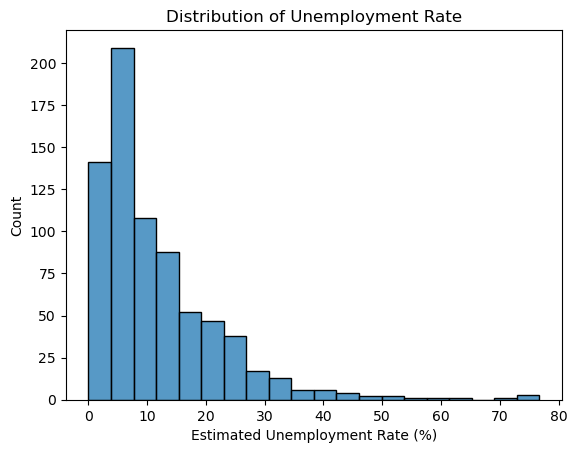

In [ ]:
#Distribution of Unemployment Rate
sns.histplot(df1, x='Estimated Unemployment Rate (%)', 
                    bins=20,)
plt.title('Distribution of Unemployment Rate');

In [48]:
df1.head()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9


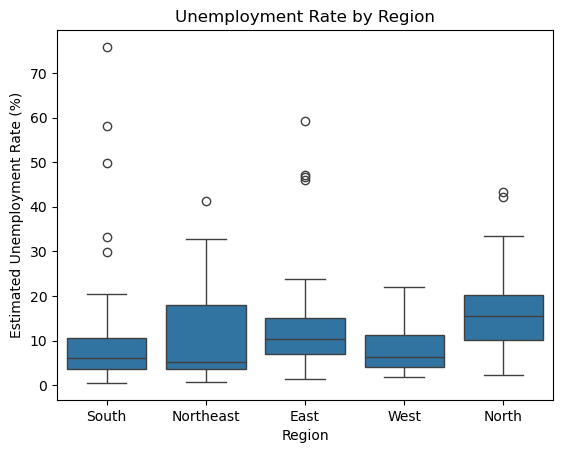

In [ ]:
#Unemployment Rate by Region
sns.boxplot(df, x='Region', y=Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate by Region');

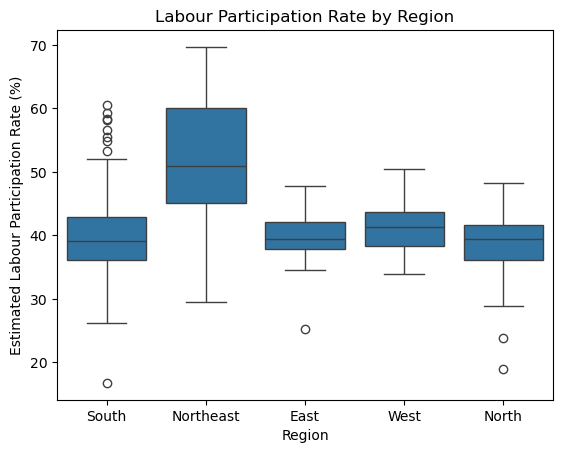

In [ ]:
#Labour Participation Rate by Region
sns.boxplot(df, x='Region', y='Estimated Labour Participation Rate (%)')
plt.title('Labour Participation Rate by Region');

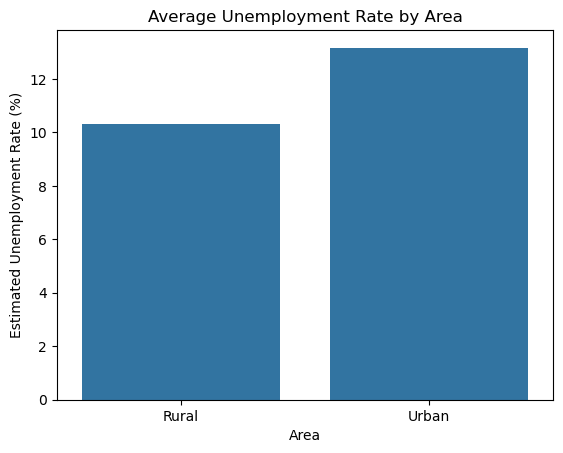

In [ ]:
#Average Unemployment Rate by Area
sns.barplot(df1.groupby('Area')['Estimated Unemployment Rate (%)'].mean().reset_index(), 
             x='Area', y='Estimated Unemployment Rate (%)')
plt.title('Average Unemployment Rate by Area');

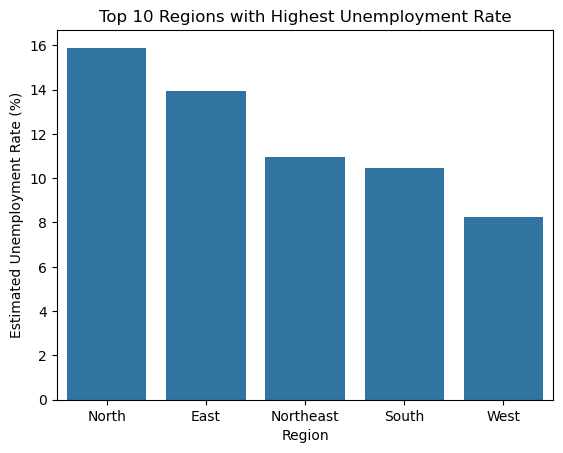

In [56]:
top_regions = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()
top_regions = top_regions.sort_values(by='Estimated Unemployment Rate (%)', ascending=False).head(10)
sns.barplot(top_regions, x='Region', y='Estimated Unemployment Rate (%)')
plt.title('Top 10 Regions with Highest Unemployment Rate');

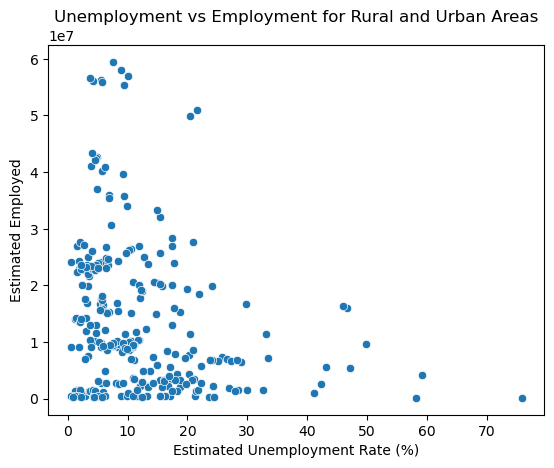

In [59]:
sns.scatterplot(df, x='Estimated Unemployment Rate (%)', y='Estimated Employed')
plt.title('Unemployment vs Employment for Rural and Urban Areas');

In [62]:
df["Date"]= pd.to_datetime(df["Date"])

In [67]:
df1.head()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,January,2020.0
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,February,2020.0
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,March,2020.0
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,April,2020.0
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,May,2020.0


In [69]:
df1.columns

Index(['State', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area',
       'Month', 'Year', 'Unemployment_Category'],
      dtype='object')

In [71]:
# Extract Year and Month from Date
df1['Year'] = df1['Date'].dt.year  # Extract year
df1['Month'] = df1['Date'].dt.month_name()  # Extract month

# Unemployment Category (Low, Medium, High)
bins = [0, 5, 15, 25, 77] # Define bins
labels = ['Low', 'Medium', 'High', 'Very High'] # Define labels
df1['Unemployment_Category'] = pd.cut(df1['Estimated Unemployment Rate (%)'], bins=bins, labels=labels, right=False) # create a new column

# Employment Growth Rate (Month-over-Month)
# Sort by Region, Area, and Date to ensure correct calculation
df1 = df1.sort_values(by=['State', 'Area', 'Date'])
# Calculate the percentage change in 'Employed' column
df1['Employment_Growth_Rate'] = df1.groupby(['State', 'Area'])['Estimated Employed'].pct_change() * 100
# Fill NaN values with 0 if occured
df1['Employment_Growth_Rate'] = df1['Employment_Growth_Rate'].fillna(0)

# Flag data from April 2020 onwards as COVID-19 period
df1['COVID_19_Flag'] = df1['Date'].apply(lambda x: 'Yes' if x >= pd.to_datetime('2020-04-01') else 'No')

# Unemployment-to-Employment Ratio
df1['Unemployment_to_Employment_Ratio'] = df1['Estimated Unemployment Rate (%)'] / (100 - df1['Estimated Unemployment Rate (%)'])

# Seasonality Flag (Quarter)
def get_season(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

df1['Quarter_Season'] = df1['Month'].apply(get_season)

print("7 New features added successfully")

7 New features added successfully


Features Created
Year and Month Extraction: Extracts the year and month from the Date column

Unemployment Category: Categorizes unemployment rates into Low, Medium, High and Very High

Employment Growth Rate: Calculates the month-over-month growth rate in employment

COVID-19 Impact Flag: Flags data from April 2020 onwards as the COVID-19 period

Unemployment-to-Employment Ratio: Calculates the ratio of unemployed to employed people

Seasonality Flag: Adds a column to indicate the quarter (Q1, Q2, Q3, Q4)

In [72]:
df1.head()

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month,Year,Unemployment_Category,Employment_Growth_Rate,COVID_19_Flag,Unemployment_to_Employment_Ratio,Quarter_Season
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,May,2019,Low,0.000000,No,0.037883,Q4
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,June,2019,Low,-2.027295,No,0.031460,Q4
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,July,2019,Low,2.814132,No,0.038961,Q4
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,August,2019,Low,1.646321,No,0.034340,Q4
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,September,2019,Medium,-0.235485,No,0.054519,Q4


In [74]:
# Average unemployment rate before and after COVID-19
pre_covid = df1[df1['COVID_19_Flag'] == 'No']['Estimated Unemployment Rate (%)'].mean()
post_covid = df1[df1['COVID_19_Flag'] == 'Yes']['Estimated Unemployment Rate (%)'].mean()
print(f"Average Unemployment Rate (Pre-COVID): {pre_covid:.2f}%")
print(f"Average Unemployment Rate (Post-COVID): {post_covid:.2f}%")

Average Unemployment Rate (Pre-COVID): 9.61%
Average Unemployment Rate (Post-COVID): 20.19%


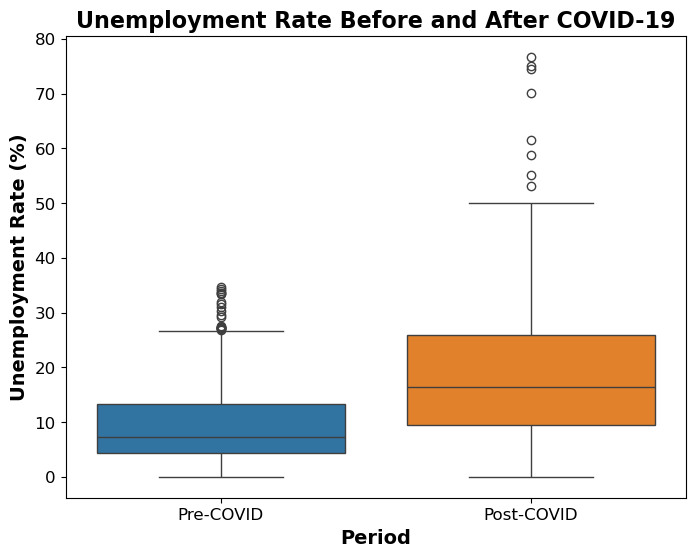

In [75]:
# Plot unemployment rate before and after COVID-19
plt.figure(figsize=(8, 6))
sns.boxplot(x='COVID_19_Flag', y='Estimated Unemployment Rate (%)', data=df1, palette=['#1f77b4', '#ff7f0e'])
plt.title('Unemployment Rate Before and After COVID-19', fontsize=16, fontweight='bold')
plt.xlabel('Period', fontsize=14, fontweight='bold')
plt.ylabel('Unemployment Rate (%)', fontsize=14, fontweight='bold')
plt.xticks([0, 1], ['Pre-COVID', 'Post-COVID'], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

A significant increase in the average unemployment rate after April 2020 indicates the impact of COVID-19

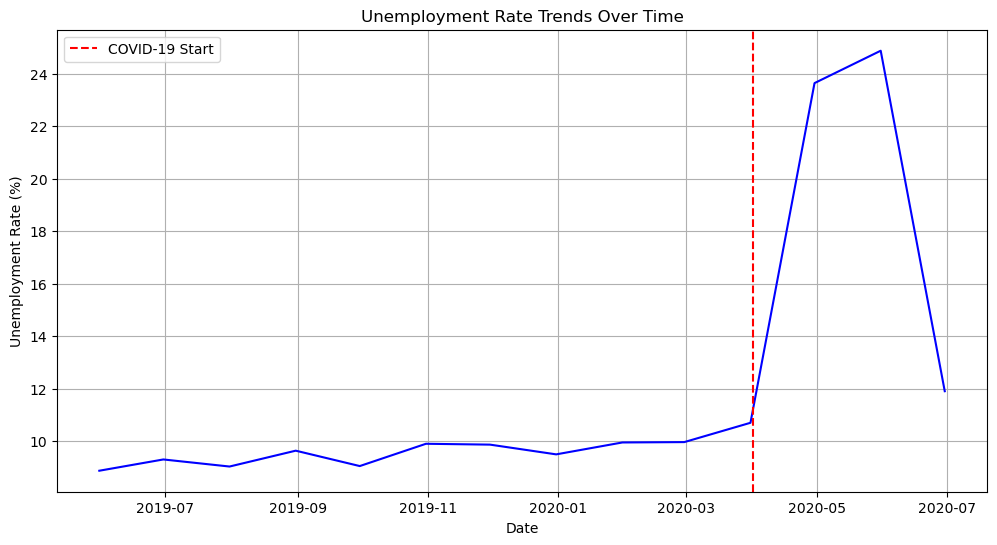

In [77]:
# Plot unemployment rate trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df1, estimator='mean', ci=None, color='blue')
plt.axvline(pd.to_datetime('2020-04-01'), color='red', linestyle='--', label='COVID-19 Start')
plt.title('Unemployment Rate Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid()
plt.show()

COVID-19 Impact:
There is a sharp spike in the unemployment rate around April 2020, indicating the immediate impact of COVID-19.

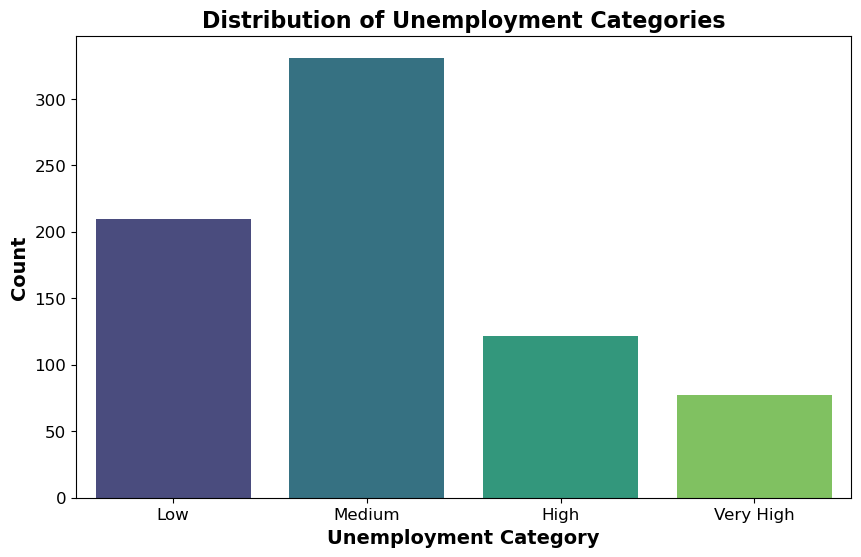

In [78]:
# Plot unemployment category distribution
plt.figure(figsize=(10, 6))
sns.countplot(
    x='Unemployment_Category', 
    data=df1, 
    order=['Low', 'Medium', 'High', 'Very High'], 
    palette='viridis'
)
plt.title('Distribution of Unemployment Categories', fontsize=16, fontweight='bold')
plt.xlabel('Unemployment Category', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

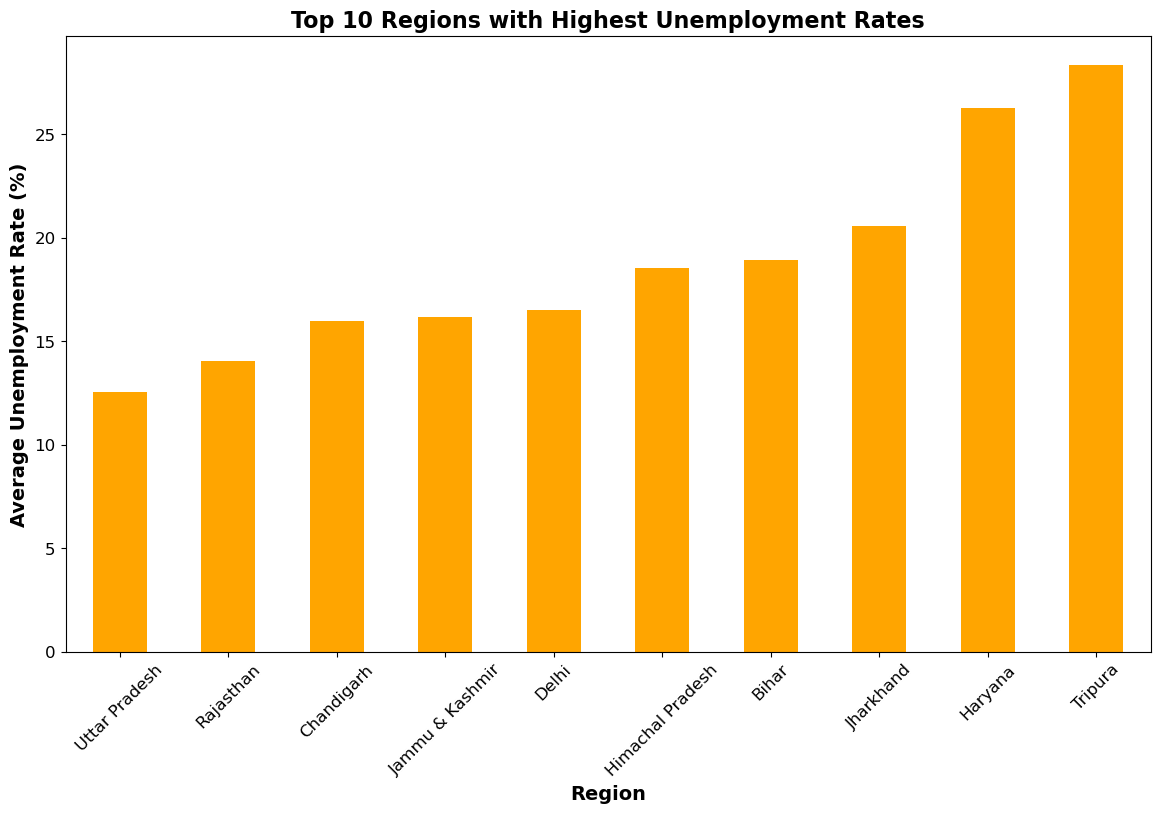

In [82]:
# Average unemployment rate by region
avg_unemployment = df1.groupby('State')['Estimated Unemployment Rate (%)'].mean().sort_values()

# make plot
plt.figure(figsize=(14, 8))
avg_unemployment.tail(10).plot(kind='bar', color='orange')
plt.title('Top 10 Regions with Highest Unemployment Rates', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=14, fontweight='bold')
plt.ylabel('Average Unemployment Rate (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

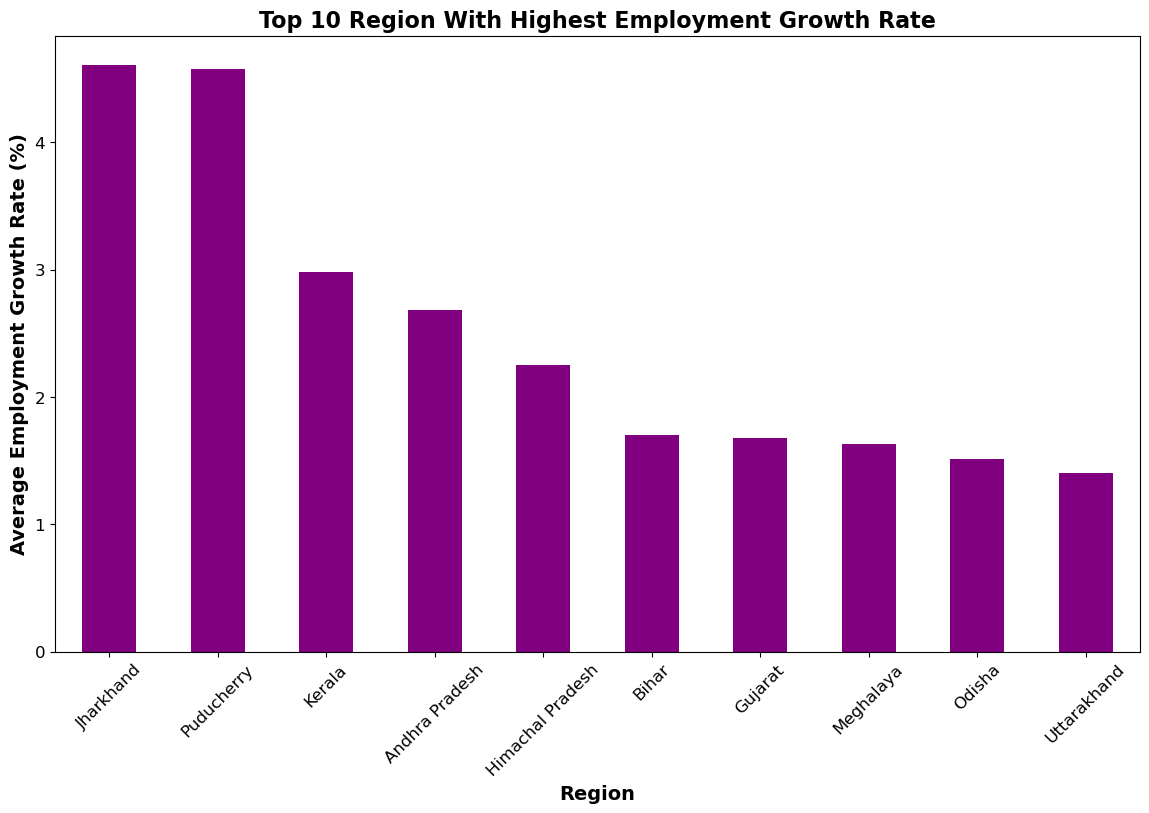

In [84]:
# Average labor participation rate by region
avg_employment_rate = df1.groupby('State')['Employment_Growth_Rate'].mean().sort_values(ascending=False).head(10)

# Make plot
plt.figure(figsize=(14, 8))
avg_employment_rate.plot(kind='bar', color='purple')
plt.title('Top 10 Region With Highest Employment Growth Rate', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=14, fontweight='bold')
plt.ylabel('Average Employment Growth Rate (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()